In [3]:
# Limpieza y procesamiento de datos

- Corrección formato países
- Adecuar las columnas con valores nulos

SyntaxError: invalid syntax (3013574351.py, line 3)

In [1]:
import pandas as pd
df = pd.read_csv("../data/processed/movies_merged.csv")
df.head()

,id,title,original_title,production_countries,overview,tagline,release_date,original_language,genres,runtime,budget,revenue,cast,vote_average,director,keywords
0,41465,Vivir con papá,Life with Father,['United States of America'],"La acción se desarrolla hacia 1880, en el domi...",NaN,1947-09-13,en,"Comedia, Familia",118,0,0,"['William Powell', 'Irene Dunne', 'Elizabeth T...",6.600,Michael Curtiz,"[""family's daily life"", 'broker', 'based on pl..."
1,28297,Fuerza bruta,Brute Force,['United States of America'],Tras los muros de la penitenciaría Westgate im...,¡Imagen llena de energía!,1947-07-16,en,"Crimen, Drama, Suspense",98,0,0,"['Burt Lancaster', 'Hume Cronyn', 'Charles Bic...",7.288,Jules Dassin,"['prison cell', 'prison guard', 'film noir', '..."
2,52844,Sucedió en la 5ª avenida,It Happened on Fifth Avenue,['United States of America'],Un vagabundo neoyorquino se muda a una mansión...,NaN,1947-04-17,en,"Comedia, Romance, Música",116,0,0,"['Don DeFore', 'Ann Harding', 'Charles Ruggles']",7.000,Roy Del Ruth,"['new york city', 'homeless person', 'holiday'..."
3,30308,El asesino poeta,Lured,['United States of America'],Siete bellas jóvenes son encontradas asesinada...,NaN,1947-08-28,en,"Misterio, Crimen, Suspense",109,0,0,"['George Sanders', 'Lucille Ball', 'Charles Co...",6.313,Douglas Sirk,"['london, england', 'undercover', 'poetry', 's..."
4,22356,El ángel y el pistolero,Angel and the Badman,['United States of America'],"Quirt Evans (John Wayne), un pistolero malheri...",NaN,1947-02-15,en,"Western, Romance, Aventura, Acción",100,0,0,"['John Wayne', 'Gail Russell', 'Harry Carey']",6.400,James Edward Grant,"['love at first sight', 'shootout', 'quakerism..."


In [2]:
# Lista actual de países únicos

paises_unicos = set()

for entry in df["production_countries"].dropna():
    for pais in entry.split(","):
        paises_unicos.add(pais.strip())

print(sorted(paises_unicos))

["'Afghanistan'", "'Algeria']", "'Argentina'", "'Argentina']", "'Australia'", "'Australia']", "'Austria'", "'Austria']", "'Bahamas'", "'Barbados']", "'Belarus']", "'Belgium'", "'Belgium']", "'Botswana']", "'Brazil'", "'Brazil']", "'Bulgaria'", "'Bulgaria']", "'Cameroon'", "'Canada'", "'Canada']", "'Chile'", "'Chile']", "'China'", "'China']", "'Colombia'", "'Colombia']", "'Cuba']", "'Cyprus']", "'Czech Republic'", "'Czech Republic']", "'Czechoslovakia'", "'Denmark'", "'Denmark']", "'Dominican Republic'", "'East Germany'", "'East Germany']", "'Ecuador'", "'Egypt']", "'Estonia'", "'Faeroe Islands']", "'Finland'", "'Finland']", "'France'", "'France']", "'Georgia']", "'Germany'", "'Germany']", "'Greece'", "'Greece']", "'Guadaloupe'", "'Hong Kong'", "'Hong Kong']", "'Hungary'", "'Hungary']", "'Iceland'", "'Iceland']", "'India'", "'India']", "'Iran'", "'Iran']", "'Iraq']", "'Ireland'", "'Ireland']", "'Israel'", "'Israel']", "'Italy'", "'Italy']", "'Japan'", "'Japan']", "'Kazakhstan'", "'Kenya

In [3]:
# Limpieza de países

import ast

def normalizar_paises(valor):
    try:
        lista = ast.literal_eval(valor)
        if isinstance(lista, list):
            return [pais.strip().strip("'").strip('"') for pais in lista if pais]
    except (ValueError, SyntaxError):
        return []
    return []

df["production_countries"] = df["production_countries"].fillna("[]")
df["production_countries"] = df["production_countries"].apply(normalizar_paises)

df["main_country"] = df["production_countries"].apply(lambda x: x[0] if x else None)

In [4]:
#Mostramos la lista actualizada de países

paises_unicos = set()
for entry in df["production_countries"].dropna():
    for pais in entry: 
        paises_unicos.add(pais.strip())

print(sorted(paises_unicos))

['Afghanistan', 'Algeria', 'Andorra', 'Argentina', 'Aruba', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Bulgaria', 'Cambodia', 'Cameroon', 'Canada', 'Chile', 'China', 'Colombia', 'Cuba', 'Cyprus', 'Czech Republic', 'Czechoslovakia', 'Denmark', 'Dominican Republic', 'East Germany', 'Ecuador', 'Egypt', 'Estonia', 'Faeroe Islands', 'Finland', 'France', 'Georgia', 'Germany', 'Greece', 'Guadaloupe', 'Haiti', 'Hong Kong', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan', 'Kazakhstan', 'Kenya', 'Kuwait', 'Latvia', 'Lebanon', 'Libyan Arab Jamahiriya', 'Liechtenstein', 'Lithuania', 'Luxembourg', 'Malawi', 'Malaysia', 'Malta', 'Mexico', 'Monaco', 'Mongolia', 'Morocco', 'Namibia', 'Netherlands', 'New Zealand', 'Nicaragua', 'Nigeria', 'North Korea', 'Northern Mariana Islands', 'Norway', 'Panama', 'Peru', 'Philippines'

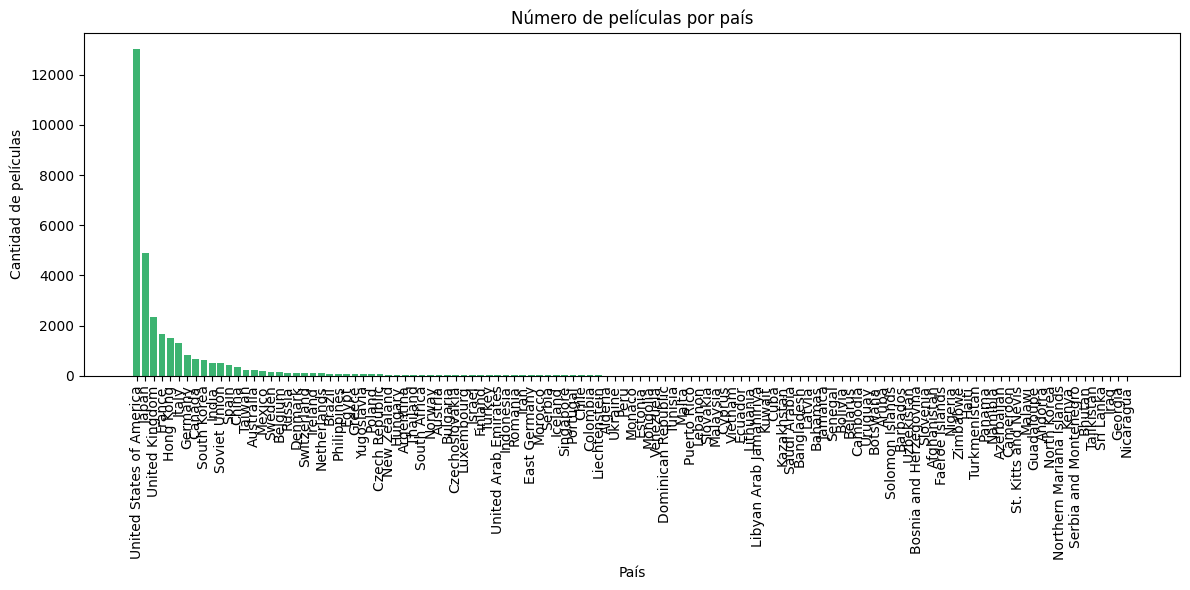

In [5]:
import matplotlib.pyplot as plt
from collections import Counter

all_countries = []
for entry in df["production_countries"].dropna():
    all_countries.extend([pais.strip() for pais in entry])

country_counts = Counter(all_countries)

df_countries = pd.DataFrame(country_counts.items(), columns=["País", "Películas"])
df_countries = df_countries.sort_values("Películas", ascending=False)

plt.figure(figsize=(12,6))
plt.bar(df_countries["País"], df_countries["Películas"], color="mediumseagreen")
plt.xticks(rotation=90)
plt.title("Número de películas por país")
plt.ylabel("Cantidad de películas")
plt.xlabel("País")
plt.tight_layout()
plt.show()

In [6]:
df_countries.head(15)

,País,Películas
0,United States of America,13017
1,Japan,4881
2,United Kingdom,2343
6,France,1682
26,Hong Kong,1512
10,Italy,1288
16,Germany,845
12,Canada,649
13,South Korea,640
27,India,513


In [7]:
# Solución a los valores nulos

df.isnull().mean().sort_values(ascending=False)

tagline                 0.709373
overview                0.310902
genres                  0.024863
main_country            0.012275
director                0.002510
production_countries    0.000000
original_title          0.000000
release_date            0.000000
original_language       0.000000
title                   0.000000
runtime                 0.000000
budget                  0.000000
revenue                 0.000000
cast                    0.000000
vote_average            0.000000
keywords                0.000000
id                      0.000000
dtype: float64

In [8]:
null_percent = df.isnull().mean().sort_values(ascending=False)*100
null_percent[null_percent > 0].round(2)

tagline         70.94
overview        31.09
genres           2.49
main_country     1.23
director         0.25
dtype: float64

In [41]:
# Tagline tiene un porcentaje muy alto de nulos. Es mejor prescindir de esta columna.
# Overview es importante, rellenaremos los huecos.
# Main_country y director tienen muy bajo porcentaje nulo, también lo rellenaremos.
# Con Genres hay que asegurarse de que todos los valores sean listas válidas. 

In [9]:
# Tagline
df.drop(columns=["tagline"], inplace=True)

df.isnull().mean().sort_values(ascending=False)


overview                0.310902
genres                  0.024863
main_country            0.012275
director                0.002510
id                      0.000000
title                   0.000000
original_title          0.000000
production_countries    0.000000
release_date            0.000000
original_language       0.000000
runtime                 0.000000
budget                  0.000000
revenue                 0.000000
cast                    0.000000
vote_average            0.000000
keywords                0.000000
dtype: float64

In [10]:
# Overview

df["overview"] = df["overview"].fillna("Sin descripción disponible.")

df.isnull().mean().sort_values(ascending=False)

genres                  0.024863
main_country            0.012275
director                0.002510
id                      0.000000
title                   0.000000
original_title          0.000000
production_countries    0.000000
overview                0.000000
release_date            0.000000
original_language       0.000000
runtime                 0.000000
budget                  0.000000
revenue                 0.000000
cast                    0.000000
vote_average            0.000000
keywords                0.000000
dtype: float64

In [11]:
# main_country

df["main_country"] = df["main_country"].fillna("Unknown")

df.isnull().mean().sort_values(ascending=False)

genres                  0.024863
director                0.002510
id                      0.000000
title                   0.000000
original_title          0.000000
production_countries    0.000000
overview                0.000000
release_date            0.000000
original_language       0.000000
runtime                 0.000000
budget                  0.000000
revenue                 0.000000
cast                    0.000000
vote_average            0.000000
keywords                0.000000
main_country            0.000000
dtype: float64

In [12]:
# director

df["director"] = df["director"].fillna("Unknown")

df.isnull().mean().sort_values(ascending=False)

genres                  0.024863
id                      0.000000
title                   0.000000
original_title          0.000000
production_countries    0.000000
overview                0.000000
release_date            0.000000
original_language       0.000000
runtime                 0.000000
budget                  0.000000
revenue                 0.000000
cast                    0.000000
vote_average            0.000000
director                0.000000
keywords                0.000000
main_country            0.000000
dtype: float64

In [13]:
# genres

df["genres"].iloc[0]

df["genres"] = df["genres"].apply(lambda x: [g.strip() for g in x.split(",")] if isinstance(x, str) else [])

In [14]:
df["genres"].iloc[0]

['Comedia', 'Familia']

In [15]:
# Guardamos progreso
import os
os.makedirs("data", exist_ok=True)
df.to_csv("data/movies_paso1_limpieza.csv", index=False)

In [16]:
# Normalización de los nombres de director

directores = df['director'].value_counts(dropna=False)
print(directores,"\n")

directores_unicos = set()

for entry in df["director"].dropna():
    for director in entry.split(","):
        directores_unicos.add(director.strip())

print(sorted(directores_unicos))

director
Chang Cheh           71
Unknown              64
Masahiro Makino      55
Sadatsugu Matsuda    52
Kinji Fukasaku       49
                     ..
Ali Selim             1
David Steiman         1
Matías Bize           1
Shaun Monson          1
Tsui Siu-Ming         1
Name: count, Length: 8195, dtype: int64 

['A. Bhimsingh', 'A. Edward Sutherland', 'A. V. Meiyappan', 'A.B. Stone', 'A.R. Murugadoss', 'Aamir Khan', 'Aaron Blaise', 'Aaron Harvey', 'Aaron Horvath', 'Aaron Huggett', 'Aaron Kim', 'Aaron Lipstadt', 'Aaron Mirtes', 'Aaron Moorhead', 'Aaron Nee', 'Aaron Norris', 'Aaron Schneider', 'Aaron Seltzer', 'Aaron Sorkin', 'Abbas Alibhai Burmawalla', 'Abbas Kamel', 'Abbas Kiarostami', 'Abbo Q. Dela Cruz', 'Abby Berlin', 'Abby Kohn', 'Abdellatif Kechiche', 'Abe Levitow', 'Abel Ferrara', 'Abel Gance', 'Abel Salazar', 'Abhishek Pathak', 'Abhishek Varman', 'Abner Biberman', 'Abraham Polonsky', 'Abram Room', 'Acharya Atre', 'Adam Bhala Lough', 'Adam Brooks', 'Adam Elliot', 'Adam Green', 

In [17]:
correcciones_directores = {
    'Alan Mak Siu-Fai': 'Alan Mak',
    'Benny Chan Muk-Sing': 'Benny Chan',
    'Corey Yuen Kwai': 'Corey Yuen',
    'Jess Franco': 'Jesús Franco',
    'Joseph L. Mankiewicz': 'Joseph Mankiewicz'
}
df['director'] = df['director'].replace(correcciones_directores)
    

In [18]:
directores = df['director'].value_counts(dropna=False)
print(directores,"\n")

directores_unicos = set()

for entry in df["director"].dropna():
    for director in entry.split(","):
        directores_unicos.add(director.strip())

print(sorted(directores_unicos))

director
Chang Cheh           71
Unknown              64
Masahiro Makino      55
Sadatsugu Matsuda    52
Kinji Fukasaku       49
                     ..
Ali Selim             1
David Steiman         1
Matías Bize           1
Shaun Monson          1
Tsui Siu-Ming         1
Name: count, Length: 8195, dtype: int64 

['A. Bhimsingh', 'A. Edward Sutherland', 'A. V. Meiyappan', 'A.B. Stone', 'A.R. Murugadoss', 'Aamir Khan', 'Aaron Blaise', 'Aaron Harvey', 'Aaron Horvath', 'Aaron Huggett', 'Aaron Kim', 'Aaron Lipstadt', 'Aaron Mirtes', 'Aaron Moorhead', 'Aaron Nee', 'Aaron Norris', 'Aaron Schneider', 'Aaron Seltzer', 'Aaron Sorkin', 'Abbas Alibhai Burmawalla', 'Abbas Kamel', 'Abbas Kiarostami', 'Abbo Q. Dela Cruz', 'Abby Berlin', 'Abby Kohn', 'Abdellatif Kechiche', 'Abe Levitow', 'Abel Ferrara', 'Abel Gance', 'Abel Salazar', 'Abhishek Pathak', 'Abhishek Varman', 'Abner Biberman', 'Abraham Polonsky', 'Abram Room', 'Acharya Atre', 'Adam Bhala Lough', 'Adam Brooks', 'Adam Elliot', 'Adam Green', 

In [19]:
# Guardamos el archivo 
df.to_csv("data/movies_limpios.csv", index=False)